In this tutorial, we demonstrate a text classification model from raw text from scratch based on the IMDB sentiment classification dataset.

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf
import numpy as np
from keras import layers

##### Load Dataset
The dataset folder contains a train and test subfolder

In [1]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 80.2M    0  256k    0     0   240k      0  0:05:41  0:00:01  0:05:40  240k
  1 80.2M    1 1616k    0     0   787k      0  0:01:44  0:00:02  0:01:42  787k
  4 80.2M    4 4032k    0     0  1321k      0  0:01:02  0:00:03  0:00:59 1321k
  8 80.2M    8 7360k    0     0  1816k      0  0:00:45  0:00:04  0:00:41 1816k
 14 80.2M   14 11.8M    0     0  2394k      0  0:00:34  0:00:05  0:00:29 2413k
 21 80.2M   21 17.1M    0     0  2903k      0  0:00:28  0:00:06  0:00:22 3471k
 28 80.2M   28 22.5M    0     0  3271k      0  0:00:25  0:00:07  0:00:18 4291k
 35 80.2M   35 28.7M    0     0  3662k      0  0:00:22  0:00:08  0:00:14 5092k
 44 80.2M   44 35.6M    0     0  4032k      0  0:00

In [3]:
!dir aclImdb

 Volume in drive C has no label.
 Volume Serial Number is 04EE-8402

 Directory of c:\Users\adewo\Documents\Projects\DL_from_scratch_using_tensorflow\aclImdb

06/25/2011  06:08 PM    <DIR>          .
03/15/2024  05:07 PM    <DIR>          ..
04/12/2011  10:14 AM           845,980 imdb.vocab
06/11/2011  03:54 PM           903,029 imdbEr.txt
06/25/2011  05:18 PM             4,037 README
04/12/2011  10:22 AM    <DIR>          test
06/25/2011  06:09 PM    <DIR>          train
               3 File(s)      1,753,046 bytes
               4 Dir(s)  132,416,253,952 bytes free


In [11]:
## Chec content of the test directory
!dir aclImdb\test

 Volume in drive C has no label.
 Volume Serial Number is 04EE-8402

 Directory of c:\Users\adewo\Documents\Projects\DL_from_scratch_using_tensorflow\aclImdb\test

04/12/2011  10:22 AM    <DIR>          .
06/25/2011  06:08 PM    <DIR>          ..
04/12/2011  10:25 AM        20,205,283 labeledBow.feat
04/12/2011  02:48 AM    <DIR>          neg
04/12/2011  02:48 AM    <DIR>          pos
04/12/2011  02:48 AM           612,500 urls_neg.txt
04/12/2011  02:48 AM           612,500 urls_pos.txt
               3 File(s)     21,430,283 bytes
               4 Dir(s)  131,534,499,840 bytes free


In [10]:
## Chec content of the train directory
!dir aclImdb\train

 Volume in drive C has no label.
 Volume Serial Number is 04EE-8402

 Directory of c:\Users\adewo\Documents\Projects\DL_from_scratch_using_tensorflow\aclImdb\train

06/25/2011  06:09 PM    <DIR>          .
06/25/2011  06:08 PM    <DIR>          ..
04/12/2011  10:17 AM        21,021,197 labeledBow.feat
04/12/2011  02:47 AM    <DIR>          neg
04/12/2011  02:47 AM    <DIR>          pos
04/12/2011  02:47 AM    <DIR>          unsup
04/12/2011  10:22 AM        41,348,699 unsupBow.feat
04/12/2011  02:48 AM           612,500 urls_neg.txt
04/12/2011  02:48 AM           612,500 urls_pos.txt
04/12/2011  02:47 AM         2,450,000 urls_unsup.txt
               5 File(s)     66,044,896 bytes
               5 Dir(s)  131,534,598,144 bytes free


The train and test folders contains pos and negative subfolders for the positive and negative reviews. Lets see an example positive review from the train folder.

In [16]:
!type aclImdb\train\pos\6248_7.txt

Being an Austrian myself this has been a straight knock in my face. Fortunately I don't live nowhere near the place where this movie takes place but unfortunately it portrays everything that the rest of Austria hates about Viennese people (or people close to that region). And it is very easy to read that this is exactly the directors intention: to let your head sink into your hands and say "Oh my god, how can THAT be possible!". No, not with me, the (in my opinion) totally exaggerated uncensored swinger club scene is not necessary, I watch porn, sure, but in this context I was rather disgusted than put in the right context.<br /><br />This movie tells a story about how misled people who suffer from lack of education or bad company try to survive and live in a world of redundancy and boring horizons. A girl who is treated like a whore by her super-jealous boyfriend (and still keeps coming back), a female teacher who discovers her masochism by putting the life of her super-cruel "lover" 

Now we can use keras.utils.text_dataset_from_directory to generate a labeled tf.data.dataset object from a set of text files on disk filed into class-specific folders. We will use this to generate the training, validation dataset from the train directory using 80:20 split. We will use the test directory to generate the test dataset. 

In [14]:
import keras

batch_size = 32
raw_train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1000
)

raw_val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1000,
)

raw_test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test",
    batch_size=batch_size
)

print(f"Number of batches in train dataset: {raw_train_ds.cardinality()}")
print(f"Number of batches in validation dataset: {raw_val_ds.cardinality()}")
print(f"Number of batches in test dataset: {raw_test_ds.cardinality()}")

Found 75000 files belonging to 3 classes.
Using 60000 files for training.
Found 75000 files belonging to 3 classes.
Using 15000 files for validation.
Found 25000 files belonging to 2 classes.
Number of batches in train dataset: 1875
Number of batches in validation dataset: 469
Number of batches in test dataset: 782


Let's preview few samples of the data to ensure normalization and tokenization will work as expected. We use eager execution by evaluating the tensors using numpy().

In [15]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(2):
        print(f"Text: {text_batch.numpy()[i]}")
        print(f"Label: {label_batch.numpy()[i]}")

Text: b'OK everyone else has given a good synopsis of this movie and you should realise you\'re not getting Citizen Kane here but a solid piece of propaganda produced on the cheap and quickly when such things mattered in Britain, ie a horde of Nazi stormtroopers were waiting to invade thirty miles across the Channel and the British people better be ready to deal with it when the time comes. The fact that we now know that the real threat of invasion had already passed by that stage no one knew for sure at the time that such was the case.<br /><br />The acting is at times stiff and the dialogue can be a bit facile at times but when the acting and dialogue are good they are excellent. Look at the postmistress in the moments before she gives the German sergeant his comeuppance, watch her facial expression and wonder whether the Nazi was getting what she\'d have liked to have given her late husband, all very edgy for 1942. The women and children do get the bravest roles and even if, like th

Lets Prepare the data

In [11]:
import string
import re
import tensorflow as tf
from tensorflow.keras import layers

# We create a custom standardization to handle the HTML break tags '<br />' since this cannot be removed by derault standardizer.
def custom_standardization(input_data):
    """
    - change to lower case
    - strip all html tags
    - remove punctuations
    """
    lower_case = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lower_case, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, f"[{re.escape(string.punctuation)}]", ""
    )

# Define model constants
max_features = 20000 
sequence_length = 500 # we set an explicit maximum sequence length, since the CNNs model won't support variable sequence

# Create text vectorization layer to normalize, split, and map strings to integers.
# For this, we set out 'ouput_mode' to int'
vectorizer_layer = keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# First we extract the text-only dataset and call 'adapt' to create the vocabulary.
text_ds = raw_train_ds.map(lambda x, y: x)
# Call 'adapt' on text-only dataset
vectorizer_layer.adapt(text_ds)

In [6]:
from keras import layers

# Make the vectorization layer a part of the model
text_input = keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorizer_layer(text_input)
x = layers.Embedding(max_features+1, embedding_dim)(x)

In [12]:
# Apply the vectorization layer to the raw dataset
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorizer_layer(text), label

# retrieve a batch of 32 reviews and labels as dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b"I doubt much of this film is based on a true story. At the beginning it says based on a true story, sort of. I bet the only truth to it was there was an ex-model turned bounty hunter possibly named Domino.<br /><br />Anyways, it begins with Domino talking to Lucy Liu, who works for the FBI. Domino is being interrogated about what she knows about a theft of 10 million dollars. Through flashbacks, we see Domino as a child, then as a model, and how she became interested in being a bounty hunter. She basically tells 2 other bounty hunters off, Ed and Choco. They let her join the group. She's tough, can use any kind of weapon, and will use her good looks if needed.<br /><br />They get involved with a scam that Clarmont, a bailsman, has going. Along the way, the group starts a reality TV show, and that's where Ian Zering and Brian Austin Green become involved. They are sort of like hosts and must have been really desperate to appear in this.<br /><br />I thought the story 

We can look up the token (string) that each integer corresponds to by calling .get_vocabulary() on the layer

In [13]:
print("1627 ---> ", vectorizer_layer.get_vocabulary()[1627])
print("313 ---> ", vectorizer_layer.get_vocabulary()[313])
print("Vocabulary ---> {}".format(len(vectorizer_layer.get_vocabulary())))

1627 --->  blame
313 --->  idea
Vocabulary ---> 20000


In [16]:
# Apply to dataset
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

# Do async prefetching / buffering of the data for best GPU performance
"""
.cache() keeps data in memory after it's loaded off disk. 
This will ensure the dataset does not become a bottleneck while training your model. 
If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, 
which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.
"""
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

#### Build and Train model

In [17]:
from tensorflow.keras import losses, layers

embedding_dim = 16
model_2 = tf.keras.Sequential([
    layers.Embedding(max_features, embedding_dim), # Embedding layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding)
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(), # GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model_2.summary()

model_2.compile(loss=losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)])

epochs = 10
history = model_2.fit(train_ds,
                      validation_data=val_ds,
                      epochs=epochs)

# Evaluate the model
loss, accuracy = model_2.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - binary_accuracy: 0.1686 - loss: -192.3113 - val_binary_accuracy: 0.1705 - val_loss: -1558.1847
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 - loss: -2369.1316 - val_binary_accuracy: 0.1705 - val_loss: -5338.7432
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 - loss: -6557.4326 - val_binary_accuracy: 0.1705 - val_loss: -10764.2061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 - loss: -12337.2500 - val_binary_accuracy: 0.1705 - val_loss: -17682.9453
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 - loss: -19569.7305 - val_binary_accuracy: 0.1705 - val_loss: -26038.9297
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 - loss: -28263.0156 - val_binary_accuracy: 0.1705 - val_loss: -35819.9453
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.1680 

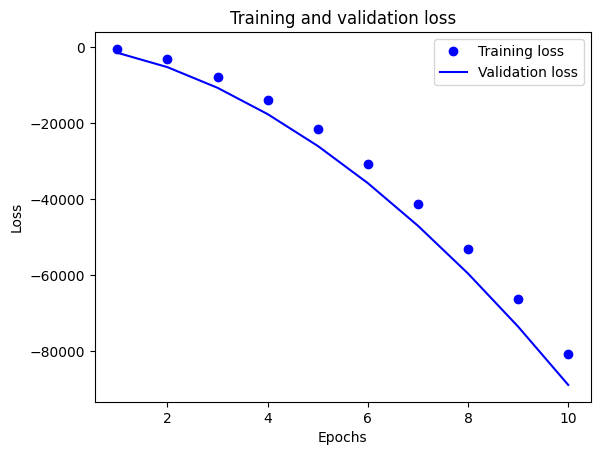

In [18]:
# To visualize the training history
history_dict = history.history
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)

import matplotlib.pyplot as plt

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

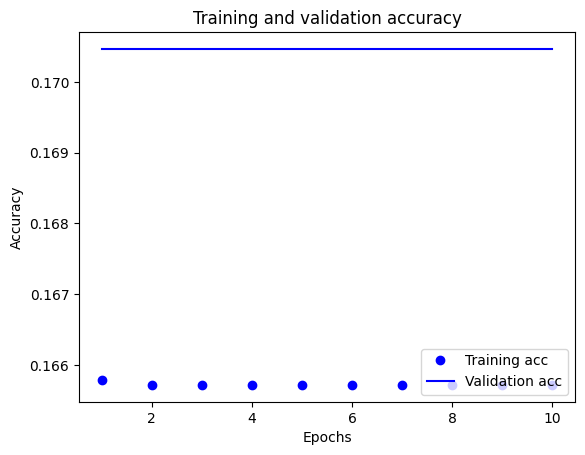

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### Make an end-to-end model to export for inference on raw strings

In [21]:
export_model = tf.keras.Sequential([
    vectorizer_layer,
    model_2,
    layers.Activation("sigmoid")
])

export_model.compile(loss=losses.BinaryCrossentropy(from_logits=False),
                     optimizer="adam",
                     metrics=["accuracy"])

loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4985 - loss: 0.8148
0.5


#### Inference on new examples

In [22]:
examples = tf.constant([
    "The movie was great",
    "The movie was okay.",
    "The movie was awful."
])

export_model.predict(examples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[0.7310586],
       [0.7310586],
       [0.7310586]], dtype=float32)